In [70]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv('..\datos_sin_procesar\insurance.csv')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Limpieza de datos

#### 1. Filas repetidas

In [73]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (1338, 7)
Tamaño del set después de eliminar las filas repetidas: (1337, 7)


#### 2. Outliers en las variables numéricas

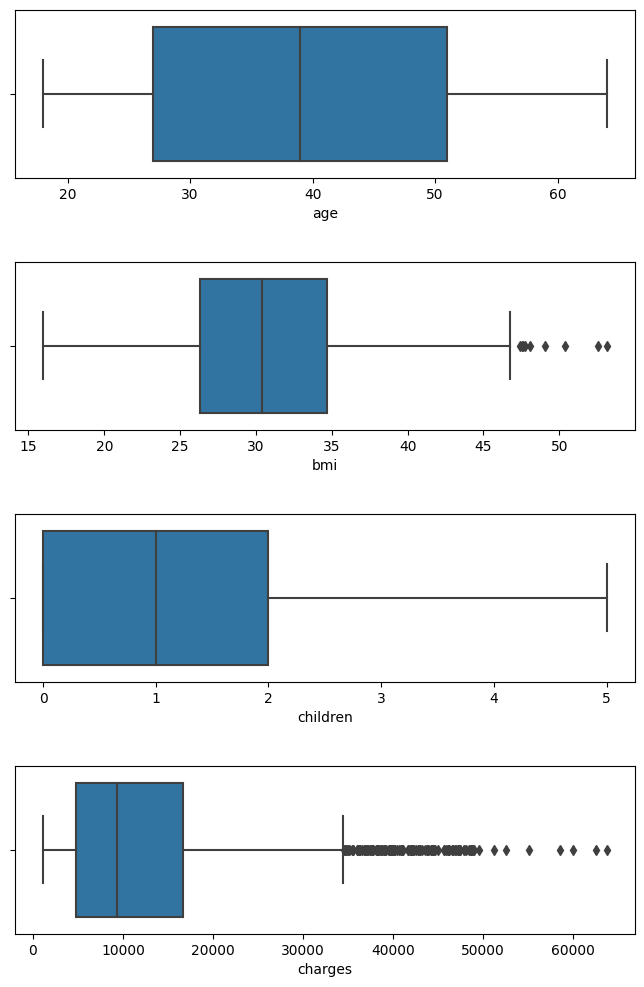

In [74]:
cols_num = data.select_dtypes(include=['float64', 'int64']).columns.to_list()

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8,12))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])

#### 3. Valores de las variables categóricas

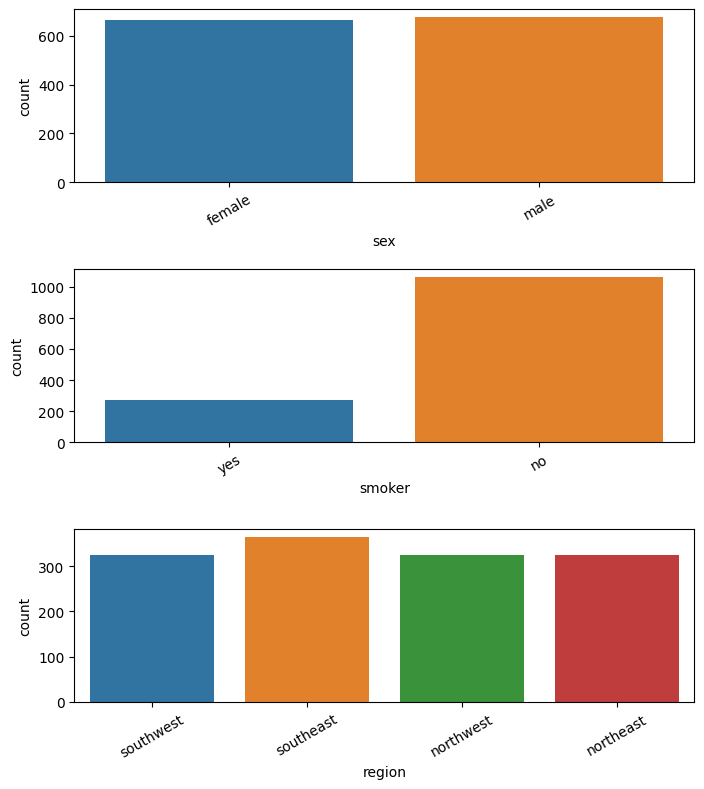

In [75]:
cols_cat = data.select_dtypes(include=['object']).columns.to_list()

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(8,9))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  #ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Se puede apreciar que los valores de las variables categóricas se encuentran bien definifidos en sus sub-niveles.

#### 4. Codificación de las variables nominales

In [76]:
data = pd.get_dummies(data=data, drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


#### 5. Matriz de correlaciones

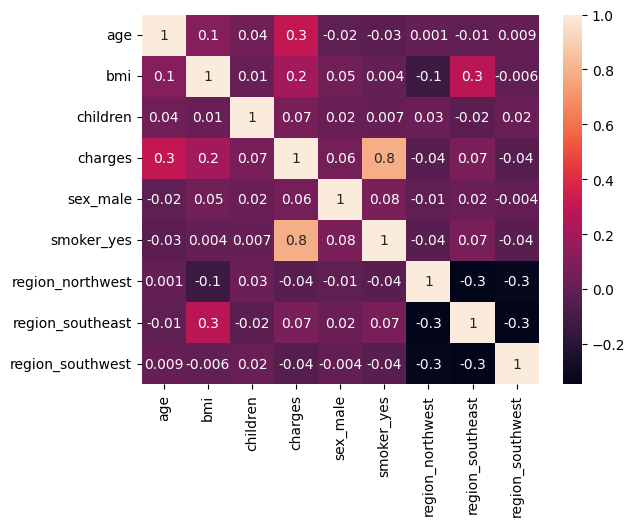

In [77]:
sns.heatmap(data.corr(), annot=True, fmt='.1g')
plt.show()

Se puede apreciar que no hay correlación entre las diferentes variables independientes. Si existe alta correlación lineal entre la variable independiente **smoker_yes** con la variable dependiente **charges**

#### 6. Guardando el dataset ya procesado

In [78]:
data.to_csv(path_or_buf='..\datos_procesados\datos_procesados.csv', sep=';', index=False)